In [15]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from ch07.simple_convnet import SimpleConvNet
from common.optimizer import *
import numpy as np

In [16]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
test_size = x_test.shape[0]
batch_size = 128
max_iterations = 1000
mi = np.arange(max_iterations)
optimizer = AdaGrad()
markers = {'sigmoid':"x", 'relu':"s", 'nSigmoid':"D"}

In [17]:
def test(test_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    test_acc = {}
    test_loss = {}
    optimizer = {}


    for key in test_list.keys():
        # 기록 리스트 생성
        train_acc[key] = []
        train_loss[key] = []
        test_acc[key] = []
        test_loss[key] = []

        # nSigmoid 경우 파라미터
        # key == 'nSigmoid_8' -> act = nSigmoid, threshold = 8
        model = test_list[key]['model']
        act = test_list[key]['act']
        std = test_list[key]['std']
        threshold = test_list[key]['threshold']
        lr = test_list[key]['lr']


        # 네트워크와 optimizer 생성
        if model == 'ANN':
            networks[key] = MultiLayerNet(
                input_size=784, hidden_size_list=[100, 100, 100, 100],
                output_size=10, activation=act, weight_init_std=std, threshold=threshold)
        else:
            networks[key] = SimpleConvNet()
        optimizer[key] = AdaGrad(lr)

    # 학습
    for i in range(max_iterations):

        # mini-batch train
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # mini-batch test
        batch_mask_t = np.random.choice(test_size, batch_size)
        x_batch_t = x_test[batch_mask_t]
        t_batch_t = t_test[batch_mask_t]

        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        # 학습
        for key in test_list.keys():
            if test_list[key]['model'] == 'CNN':
                x_batch = x_batch.reshape(-1, 1, 28, 28)
                x_batch_t = x_batch_t.reshape(-1, 1, 28, 28)
            # 학습
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            # 기록
            train_acc[key].append(networks[key].accuracy(x_batch, t_batch))
            train_loss[key].append(networks[key].loss(x_batch, t_batch))
            test_acc[key].append(networks[key].accuracy(x_batch_t, t_batch_t))
            test_loss[key].append(networks[key].loss(x_batch_t, t_batch_t))

            # 100회마다 경과 출력
            if i % 100 == 0:
                print(key + ":\n",  np.sum(np.abs(grads['W1'])))
                # print(key + " loss:" + str(acc))
                t_loss = networks[key].loss(x_batch_t, t_batch_t)
                # print(key + " loss:" + str(t_loss))

    return train_acc, train_loss, test_acc, test_loss


def plot(label, datas, t_list, *y_lim):
    for key in t_list:
        plt.plot(mi, smooth_curve(datas[key]), markevery=50, label=key)
    plt.xlabel("iterations")
    plt.ylabel(label)
    if y_lim:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()

In [18]:
test_list = {
             'relu':
                 {'model':'ANN','act':'relu','std':'he','threshold':0.5,'lr':0.01},
             'tSigmoid':
                {'model':'ANN','act':'tSigmoid','std':'xavier','threshold':5,'lr':0.01},
            'sigmoid':
                {'model':'ANN','act':'sigmoid','std':'xavier','threshold':5,'lr':0.01},
             }



train_acc, train_loss, test_acc, test_loss = test(test_list)

===========iteration:0===========
relu:
 196.40460562159876
tSigmoid:
 0.15715927083358905
sigmoid:
 0.9348217787537434
===========iteration:100===========
relu:
 104.85318498413992
tSigmoid:
 0.1586830060931952
sigmoid:
 9.794717906180395
===========iteration:200===========
relu:
 84.7071899643149
tSigmoid:
 0.11165515308830064
sigmoid:
 15.976848195241418
===========iteration:300===========
relu:
 70.07509340885446
tSigmoid:
 0.16199666773296162
sigmoid:
 20.207453265440627
===========iteration:400===========
relu:
 57.03180944963702
tSigmoid:
 0.09479256957961671
sigmoid:
 19.453571573609146
===========iteration:500===========
relu:
 51.40654408998612
tSigmoid:
 0.05545115477130174
sigmoid:
 16.773426437431834
===========iteration:600===========
relu:
 93.218424923765
tSigmoid:
 0.13988107652093512
sigmoid:
 20.88386593598258
===========iteration:700===========
relu:
 68.94798937897154
tSigmoid:
 0.15084908013411966
sigmoid:
 23.427010455068086
===========iteration:800===========
re

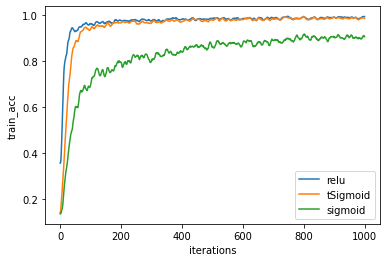

In [19]:
plot('train_acc', train_acc, test_list)

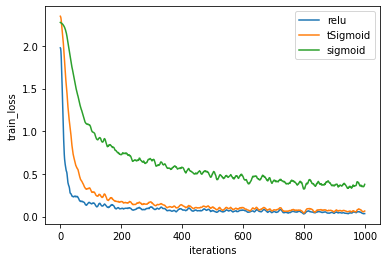

In [20]:
plot('train_loss', train_loss, test_list)

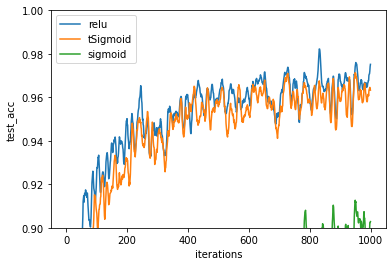

In [21]:
plot('test_acc', test_acc, test_list, *(0.9, 1))

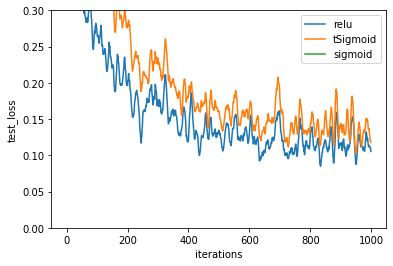

In [22]:
plot('test_loss', test_loss, test_list, *(0,0.3))

In [23]:
for key in test_list:
    print(key + " best train_acc:" + str(max(train_acc[key])))
    print(key + " best train_loss:" + str(min(train_loss[key])))
    print(key + " best test_acc:" + str(max(test_acc[key])))
    print(key + " best test_loss:" + str(min(test_loss[key])) + "\n")

relu best train_acc:1.0
relu best train_loss:0.011118287274320276
relu best test_acc:1.0
relu best test_loss:0.01384497927057951

tSigmoid best train_acc:1.0
tSigmoid best train_loss:0.01974991846582062
tSigmoid best test_acc:1.0
tSigmoid best test_loss:0.03044805349750989

sigmoid best train_acc:0.9609375
sigmoid best train_loss:0.24333522279746145
sigmoid best test_acc:0.96875
sigmoid best test_loss:0.2310306679495196



In [24]:
# act = ['nSigmoid']
# for i in range(1):
#     print(i)
#     t_a, t_l = test(0.5, act)
#
#     with open('./result/128_10/test/3.txt', 'a') as f:
#         for key in act:
#             f.write(str(i) + " best acc: " + str(max(t_a[key])) + '\n')
#             f.write(str(i) + " best loss: " + str(min(t_l[key])) + '\n')
